<a href="https://colab.research.google.com/github/zingisamatwana/Ontogec/blob/main/Toyota_Quantum_Price_List_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests beautifulsoup4 pandas

In [7]:
import pandas as pd

import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import re

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0"
}

# 🚗 1. Automart Scraper
def scrape_automart():
    url = "https://www.automart.co.za/cars/toyota-quantum-sesfikile/"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    listings = []
    for card in soup.select(".vehicle-listing"):
        try:
            title = card.select_one("h2").text.strip()
            price = card.select_one(".vehicle-price").text.strip()
            link = "https://www.automart.co.za" + card.select_one("a")["href"]
            listings.append({"Site": "Automart", "Title": title, "Price": price, "Link": link})
        except:
            continue
    return listings

# 🚗 2. Cars.co.za Scraper (basic)
def scrape_cars_co_za():
    url = "https://www.cars.co.za/usedcars/Toyota/Quantum/"
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, "html.parser")

    listings = []
    for card in soup.select("div.vehicle-listing"):
        try:
            title = card.select_one("h2.title").text.strip()
            price = card.select_one("div.price").text.strip()
            link = "https://www.cars.co.za" + card.select_one("a")["href"]
            listings.append({"Site": "Cars.co.za", "Title": title, "Price": price, "Link": link})
        except:
            continue
    return listings

# 🔄 Combine all results
automart_results = scrape_automart()
cars_results = scrape_cars_co_za()
all_results = automart_results + cars_results

# 📊 Display in a DataFrame
df = pd.DataFrame(all_results)
df # Show first 10 results

""


In [6]:
import pandas as pd

# Grouped URLs for Dealerships and Used Car Aggregators
grouped_sources = {
    "Dealership Websites": [
        "https://pristinemotors.co.za/products/2023-toyota-quantum-2-5d-4d-sesfikile-1",
        "https://nmitoyota.co.za/pre-owned/?_make=toyota&_model=2-5-d-4d-sesfikile-16-seater-bus",
        "https://www.nttgroup.co.za/used-cars-for-sale/?_make_model=quantum",
        "https://www.secunda-toyota.co.za/result/newmodelsearch/Toyota-Hiace-2-5D-4D-Sesfikile-16s-1_26550_PCM_PCP",
        "https://www.secunda-toyota.co.za/new-vehicles/NewModelSearch/Hiace-Ses-fikile_2797",
        "https://www.mccarthytoyota.co.za/buy/demo-toyota-quantum-panel-van-for-sale-south-africa?pid=407",
        "https://www.cfaomobility.co.za/toyota/used-cars/quantum/",
        "https://www.halfway4ways.co.za/vehicles/used?make=4&model=2441&priceTo=3000000&mileageTo=250000",
        "https://prime.co.za/toyota/quantum-hiace-2-5-d-4d-sesfikile-16s/",
        "https://trustedvirtualdealership.co.za/toyota-quantum-hiace-2-5-d-4d-sesfikile-16s-used-vereeniging-gp_vid_7061721"
    ],
    "Used Car Aggregators": [
        "https://www.motusselect.co.za/buy-cars/used/toyota/quantum",
        "https://www.mycars.co.za/search?asset_search=&asset_search_id%5B%5D=00000000-0000-0000-0002-000000000337",
        "https://www.cars.co.za/usedcars/Toyota/Quantum/",
        "https://www.autotrader.co.za/cars-for-sale/toyota/quantum/2.5d-4d/search",
        "https://www.cubbicars.co.za/search?page=1&province=0&make=353&series=3043",
        "https://www.secondsonline.co.za/new-or-second-hand-cars-for-sale/toyota/quantum",
        "https://buyacaraitest.weelee.co.za/Vehicle/TOYOTA/QUANTUM/QUANTUM-HIACE-2.5-D-4D-SESFIKILE-16s/SI-010601",
        "https://auto.avo.africa/cars-for-sale/toyota/quantum",
        "https://www.mywheels.co.za/inventory/search?q=TOYOTA%20QUANTUM&similar=true"
    ]
}

# Build initial monitoring DataFrame
monitoring_rows = []
for category, urls in grouped_sources.items():
    for url in urls:
        monitoring_rows.append({
            "Category": category,
            "Listing Site": url.split('/')[2],
            "Listing URL": url,
            "Price": "To be scraped",
            "Vehicle Title": "To be scraped",
            "Last Checked": "Not yet"
        })

monitoring_df = pd.DataFrame(monitoring_rows)
# import ace_tools as tools; tools.display_dataframe_to_user(name="Quantum Price Monitoring Setup", dataframe=monitoring_df)
monitoring_df

,Category,Listing Site,Listing URL,Price,Vehicle Title,Last Checked
0,Dealership Websites,pristinemotors.co.za,https://pristinemotors.co.za/products/2023-toy...,To be scraped,To be scraped,Not yet
1,Dealership Websites,nmitoyota.co.za,https://nmitoyota.co.za/pre-owned/?_make=toyot...,To be scraped,To be scraped,Not yet
2,Dealership Websites,www.nttgroup.co.za,https://www.nttgroup.co.za/used-cars-for-sale/...,To be scraped,To be scraped,Not yet
3,Dealership Websites,www.secunda-toyota.co.za,https://www.secunda-toyota.co.za/result/newmod...,To be scraped,To be scraped,Not yet
4,Dealership Websites,www.secunda-toyota.co.za,https://www.secunda-toyota.co.za/new-vehicles/...,To be scraped,To be scraped,Not yet
5,Dealership Websites,www.mccarthytoyota.co.za,https://www.mccarthytoyota.co.za/buy/demo-toyo...,To be scraped,To be scraped,Not yet
6,Dealership Websites,www.cfaomobility.co.za,https://www.cfaomobility.co.za/toyota/used-car...,To be scraped,To be scraped,Not yet
7,Dealership Websites,www.halfway4ways.co.za,https://www.halfway4ways.co.za/vehicles/used?m...,To be scraped,To be scraped,Not yet
8,Dealership Websites,prime.co.za,https://prime.co.za/toyota/quantum-hiace-2-5-d...,To be scraped,To be scraped,Not yet
9,Dealership Websites,trustedvirtualdealership.co.za,https://trustedvirtualdealership.co.za/toyota-...,To be scraped,To be scraped,Not yet


In [8]:
def extract_vehicle_details(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")
        text = soup.get_text(" ", strip=True)

        # Extract key fields using regex or content approximation
        price = re.search(r"R[\s]?\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?", text)
        year = re.search(r"\b(20[0-2][0-9])\b", text)
        seats = re.search(r"\b\d{2}\s?[Ss]eater[s]?\b", text)
        mileage = re.search(r"\d{1,3}(?:[.,]\d{3})*\s?(?:km|KM|Kilometres|kilometers)", text)
        price_pm = re.search(r"from\s+R[\s]?\d{1,3}(?:[.,]\d{3})*\s?(?:pm|per month)", text, re.IGNORECASE)

        title_tag = soup.find("title")
        title = title_tag.text.strip() if title_tag else "Not Found"

        return {
            "Price": price.group() if price else "",
            "Model Year": year.group() if year else "",
            "Seats": seats.group() if seats else "",
            "Mileage": mileage.group() if mileage else "",
            "Vehicle Title": title,
            "From Price PM": price_pm.group() if price_pm else ""
        }

    except Exception as e:
        return {
            "Price": f"Error: {e}",
            "Model Year": "",
            "Seats": "",
            "Mileage": "",
            "Vehicle Title": "",
            "From Price PM": ""
        }

# Apply the scraper to each link in monitoring_df
scraped_rows = []
for row in monitoring_rows:
    details = extract_vehicle_details(row["Listing URL"])
    scraped_rows.append({
        "Category": row["Category"],
        "Listing Site": row["Listing Site"],
        "Listing URL": row["Listing URL"],
        **details
    })

scraped_df = pd.DataFrame(scraped_rows)
# tools.display_dataframe_to_user(name="Scraped Quantum Listings", dataframe=scraped_df)

scraped_df

,Category,Listing Site,Listing URL,Price,Model Year,Seats,Mileage,Vehicle Title,From Price PM
0,Dealership Websites,pristinemotors.co.za,https://pristinemotors.co.za/products/2023-toy...,"R 469,950.00",2023,,000 KM,2023 Toyota Quantum 2.5D-4D Sesfikile\n\n ...,
1,Dealership Websites,nmitoyota.co.za,https://nmitoyota.co.za/pre-owned/?_make=toyot...,R 6,2024,,000 km,Automark - NMI Toyota,
2,Dealership Websites,www.nttgroup.co.za,https://www.nttgroup.co.za/used-cars-for-sale/...,,,,,403 Forbidden,
3,Dealership Websites,www.secunda-toyota.co.za,https://www.secunda-toyota.co.za/result/newmod...,,,,100km,Toyota Hiace 2.5D-4D Ses'fikile 16s,
4,Dealership Websites,www.secunda-toyota.co.za,https://www.secunda-toyota.co.za/new-vehicles/...,,,,,New Toyota Vehicles | Secunda Toyota - Hiace-S...,
5,Dealership Websites,www.mccarthytoyota.co.za,https://www.mccarthytoyota.co.za/buy/demo-toyo...,,,,,Not Found,
6,Dealership Websites,www.cfaomobility.co.za,https://www.cfaomobility.co.za/toyota/used-car...,R 86,2025,,,Used Toyota Quantum - Pre-owned Toyota Quantum...,
7,Dealership Websites,www.halfway4ways.co.za,https://www.halfway4ways.co.za/vehicles/used?m...,R12,2023,,787 km,Used Vehicles | Halfway Toyota Fourways,
8,Dealership Websites,prime.co.za,https://prime.co.za/toyota/quantum-hiace-2-5-d...,,,,,403 Forbidden,
9,Dealership Websites,trustedvirtualdealership.co.za,https://trustedvirtualdealership.co.za/toyota-...,"R529,900",2023,,,Buy 2023 Toyota Quantum/hiace 2.5 D-4d Sesfiki...,


In [10]:
# Quantum Price Monitoring Script (Google Colab-ready)

import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse, urljoin
import pandas as pd
import re

# Define all catalog or listing URLs for dealerships and aggregators
grouped_sources = {
    "Dealership Websites": [
        "https://pristinemotors.co.za/products/2023-toyota-quantum-2-5d-4d-sesfikile-1",
        "https://nmitoyota.co.za/pre-owned/?_make=toyota&_model=2-5-d-4d-sesfikile-16-seater-bus",
        "https://www.nttgroup.co.za/used-cars-for-sale/?_make_model=quantum",
        "https://www.secunda-toyota.co.za/result/newmodelsearch/Toyota-Hiace-2-5D-4D-Sesfikile-16s-1_26550_PCM_PCP",
        "https://www.secunda-toyota.co.za/new-vehicles/NewModelSearch/Hiace-Ses-fikile_2797",
        "https://www.mccarthytoyota.co.za/buy/demo-toyota-quantum-panel-van-for-sale-south-africa?pid=407",
        "https://www.cfaomobility.co.za/toyota/used-cars/quantum/",
        "https://www.halfway4ways.co.za/vehicles/used?make=4&model=2441&priceTo=3000000&mileageTo=250000",
        "https://prime.co.za/toyota/quantum-hiace-2-5-d-4d-sesfikile-16s/",
        "https://trustedvirtualdealership.co.za/toyota-quantum-hiace-2-5-d-4d-sesfikile-16s-used-vereeniging-gp_vid_7061721"
    ],
    "Used Car Aggregators": [
        "https://www.motusselect.co.za/buy-cars/used/toyota/quantum",
        "https://www.mycars.co.za/search?asset_search=&asset_search_id%5B%5D=00000000-0000-0000-0002-000000000337",
        "https://www.cars.co.za/usedcars/Toyota/Quantum/",
        "https://www.autotrader.co.za/cars-for-sale/toyota/quantum/2.5d-4d/search",
        "https://www.cubbicars.co.za/search?page=1&province=0&make=353&series=3043",
        "https://www.secondsonline.co.za/new-or-second-hand-cars-for-sale/toyota/quantum",
        "https://buyacaraitest.weelee.co.za/Vehicle/TOYOTA/QUANTUM/QUANTUM-HIACE-2.5-D-4D-SESFIKILE-16s/SI-010601",
        "https://auto.avo.africa/cars-for-sale/toyota/quantum",
        "https://www.mywheels.co.za/inventory/search?q=TOYOTA%20QUANTUM&similar=true"
    ]
}

# Helper function to extract detailed information from a single vehicle listing

def extract_vehicle_details(url):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")
        text = soup.get_text(" ", strip=True)

        price = re.search(r"R[\s]?\d{1,3}(?:[.,]\d{3})*(?:[.,]\d{2})?", text)
        year = re.search(r"\b(20[0-2][0-9])\b", text)
        seats = re.search(r"\b\d{2}\s?[Ss]eater[s]?\b", text)
        mileage = re.search(r"\d{1,3}(?:[.,]\d{3})*\s?(?:km|KM|Kilometres|kilometers)", text)
        price_pm = re.search(r"from\s+R[\s]?\d{1,3}(?:[.,]\d{3})*\s?(?:pm|per month)", text, re.IGNORECASE)

        title_tag = soup.find("title")
        title = title_tag.text.strip() if title_tag else "Not Found"

        return {
            "Listing URL": url,
            "Price": price.group() if price else "",
            "Model Year": year.group() if year else "",
            "Seats": seats.group() if seats else "",
            "Mileage": mileage.group() if mileage else "",
            "Vehicle Title": title,
            "From Price PM": price_pm.group() if price_pm else ""
        }

    except Exception as e:
        return {
            "Listing URL": url,
            "Price": f"Error: {e}",
            "Model Year": "",
            "Seats": "",
            "Mileage": "",
            "Vehicle Title": f"Error fetching: {e}",
            "From Price PM": ""
        }

# Extract up to 5 individual car listing links from each catalog page

def extract_listing_links(catalog_url, max_links=5):
    try:
        headers = {'User-Agent': 'Mozilla/5.0'}
        response = requests.get(catalog_url, headers=headers, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")
        anchors = soup.find_all("a", href=True)

        base_url = urlparse(catalog_url).scheme + "://" + urlparse(catalog_url).netloc
        listing_links = []

        for tag in anchors:
            href = tag["href"]
            if any(keyword in href.lower() for keyword in ["quantum", "sesfikile", "vehicle", "listing", "cars"]):
                full_url = href if href.startswith("http") else urljoin(base_url, href)
                if full_url not in listing_links:
                    listing_links.append(full_url)

        return listing_links[:max_links]
    except:
        return []

# Final scraping process
final_data = []

for category, urls in grouped_sources.items():
    for catalog_url in urls:
        listing_urls = extract_listing_links(catalog_url)
        for listing_url in listing_urls:
            details = extract_vehicle_details(listing_url)
            details["Category"] = category
            details["Listing Site"] = urlparse(catalog_url).netloc
            final_data.append(details)

# Output final DataFrame
quantum_df = pd.DataFrame(final_data)
quantum_df.reset_index(drop=True, inplace=True)
quantum_df


,Listing URL,Price,Model Year,Seats,Mileage,Vehicle Title,From Price PM,Category,Listing Site
0,https://pristinemotors.co.za/products/2023-toy...,"R 469,950.00",2023,,000 KM,2023 Toyota Quantum 2.5D-4D Sesfikile\n\n ...,,Dealership Websites,pristinemotors.co.za
1,https://nmitoyota.co.za/new-vehicles/,R178,,,,New Vehicles - NMI Toyota,,Dealership Websites,nmitoyota.co.za
2,https://nmitoyota.co.za/automark/toyota-quantu...,"R529,900.00",2024,,000 km,TOYOTA QUANTUM 2.5 D-4D SESFIKILE 16-SEATER BU...,,Dealership Websites,nmitoyota.co.za
3,https://nmitoyota.co.za/automark/toyota-quantu...,"R559,899.00",2025,,000 km,TOYOTA QUANTUM 2.5 D-4D SESFIKILE 16-SEATER BU...,,Dealership Websites,nmitoyota.co.za
4,https://nmitoyota.co.za/automark/toyota-quantu...,"R569,899.00",2025,,129 km,TOYOTA QUANTUM 2.5 D-4D SESFIKILE 16-SEATER BU...,,Dealership Websites,nmitoyota.co.za
5,https://nmitoyota.co.za/automark/toyota-quantu...,"R569,900.00",2024,,000 km,TOYOTA QUANTUM 2.5 D-4D SESFIKILE 16-SEATER BU...,,Dealership Websites,nmitoyota.co.za
6,https://www.nttgroup.co.za/used-cars-for-sale/,R 90,2018,,000 km,Quality Pre-Owned Vehicles at NTT Motor Group,,Dealership Websites,www.nttgroup.co.za
7,https://www.nttgroup.co.za/demo-cars-for-sale/,R 90,2025,,500 km,Affordable Demo Cars - NTT Motor Group,,Dealership Websites,www.nttgroup.co.za
8,https://www.nttgroup.co.za/new-cars-for-sale/,R 11,2022,,,The Best Car Brands at NTT Motor Group,,Dealership Websites,www.nttgroup.co.za
9,https://www.nttgroup.co.za/used-car/toyota-qua...,R 488,2021,,624 km,TOYOTA QUANTUM 2021 used Car for Sale - NTT To...,,Dealership Websites,www.nttgroup.co.za


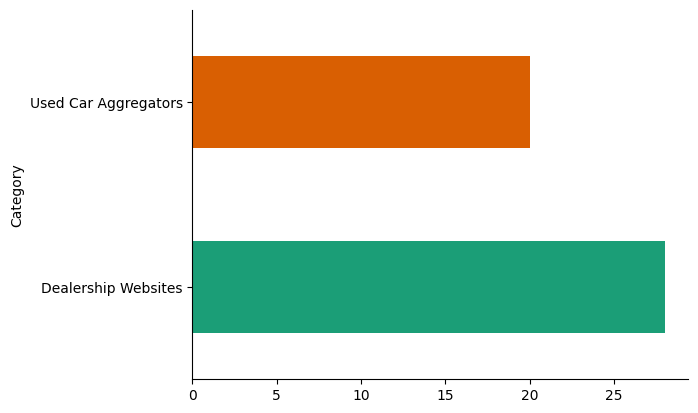

In [12]:
# @title Category

from matplotlib import pyplot as plt
import seaborn as sns
quantum_df.groupby('Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)